In [18]:
!pip install dash


In [19]:
!pip install hvplot holoviews

In [20]:
!pip install flask-ngrok

In [21]:
!pip install hvplot


In [22]:
# Initial Imports
import ssl
import tweepy
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas
import urllib.request

import panel as pn
import plotly.express as px
pn.extension('plotly')

import plotly.graph_objects as go

import dash



In [23]:
#import webbrowser

In [24]:
#from flask_ngrok import run_with_ngrok
#from flask import Flask

In [25]:
api_key="0ke6qtah41v2jst80jkwnd"


In [26]:
ssl._create_default_https_context = ssl._create_unverified_context

In [27]:
# Add Crypto Coins
coin_list = [
      "SAFEMOON",
    "MATIC",
    "LTC",
    "UNI",
    "SOL",
    "DOGE",
    "XRP",
    "BTC",
    "ETH",
    "ADA",
    "BNB",
    "AXS",
    "CAKE",
    "DOT",
    "LINK"
]
coins = ','.join(coin_list)

In [28]:
# Map out what you want
map = [
    {"name":""},
    {"symbol": ""},
    {"price": " Price: "},
    {"percent_change_24h": " - 24 Hour Percent Change: "},
    {"market_cap": " Market Cap: "},
    {"volume_24h": " 24 Hour Volume: "},
    {"url_shares": " URL Shares: "},
    #{"reddit_posts": " Reddit Posts: "},
    #{"reddit_comment" : "Reddit Comments"},
    {"tweets": " Tweets: "},
    #{"galaxy_score": " Galaxy Score: "},
    {"volatility": " Volatility: "},
    {"social_volume": " Social Volume: "},
    #{"news": " News: "},
    {"close": " Close: "},
    {'time': ' Time:'},
    {"tweet_sentiment1": "Very Bearish Sentiment"},
    {"tweet_sentiment2": " Bearish Sentiment"},
    #{"tweet_sentiment2_tweet_sentiment": "Negative Sentiment"},
    {"tweet_sentiment3": " Neutral Sentiment"},
    {"tweet_sentiment4": " Bullish Sentiment"},
    {"tweet_sentiment5": " Very Bullish Sentiment"},
    #{"tweet_sentiment4_sentiment5": " Positive Sentiment"},
    {"tweet_sentiment_impact1": "  Very Bearish Sentiment Impact"},
    {"average_sentiment": "Average Sentiment"}
    
]

In [29]:
def final_render(asset_coin, value, key, asset):
    if key == 'symbol':
        asset_coin += " (" + asset[key] + ")"
    elif key == 'percent_change_24h':
        asset_coin += value + str(asset[key]) + "%"
    else:
        asset_coin += value + str(asset[key])
    return asset_coin


In [30]:
# Define Variables
fields = [list(key.keys())[0] for key in map]
coins_df = pd.DataFrame(columns=fields)


In [31]:
# Iterates over each of the fields from Lunar Crush, gets the value from Lunar Crush and renders it with the field name
def main():

    url = "https://api.lunarcrush.com/v2?data=assets&key=" + api_key + "&symbol=" + coins
    assets = json.loads(urllib.request.urlopen(url).read())

    for asset in assets['data']:
        asset_coin = ""
        for field in map:
            key = list(field.keys())[0]
            value = list(field.values())[0]
            asset_coin = final_render(asset_coin, value, key, asset)
        print(asset_coin)
        print(len(asset_coin))
        
        return assets
        
def create_coins_df(assets):
    global coins_df
    
    for n in range(len(coin_list)):
        data = assets['data'][n]
        required_data = [{key: data[key] for key in fields}]
        
        coins_df = coins_df.append(required_data, ignore_index = True)
        
        coins_df['time'] = pd.to_datetime(coins_df['time'], unit='s', errors='coerce')
        
    return coins_df

Crypto_df = create_coins_df(main()).sort_values(["market_cap"], ascending=False)

Cardano (ADA) Price: 2.96117437 - 24 Hour Percent Change: 3.66% Market Cap: 94954174036 24 Hour Volume: 8292787308.81 URL Shares: 405 Tweets: 1289 Volatility: 0.03410497 Social Volume: 1421 Close: 2.96117437 Time:1630623600Very Bearish Sentiment15 Bearish Sentiment203 Neutral Sentiment222 Bullish Sentiment822 Very Bullish Sentiment27  Very Bearish Sentiment Impact20977Average Sentiment3.5
391


In [32]:
Crypto_df

,name,symbol,price,percent_change_24h,market_cap,volume_24h,url_shares,tweets,volatility,social_volume,close,time,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,average_sentiment
3,Bitcoin,BTC,49280.597764,0.95,926706856778,4.702159e+10,2405,11513,0.021078,12275,49280.597764,NaT,514,1001,1055,8499,444,1531128,3.6
7,Ethereum,ETH,3788.246633,0.16,444606211513,3.866254e+10,1256,4015,0.032197,4361,3788.246633,NaT,152,322,738,2708,95,273912,3.6
0,Cardano,ADA,2.961174,3.66,94954174036,8.292787e+09,405,1289,0.034105,1421,2.961174,NaT,15,203,222,822,27,20977,3.5
2,Binance Coin,BNB,483.459715,-2.78,74710795282,2.746383e+09,236,551,0.018153,569,483.459715,NaT,0,17,174,340,20,0,3.7
14,XRP,XRP,1.253682,2.11,58349281646,5.649312e+09,46,326,0.026121,346,1.253682,2021-09-02 23:00:00,1,28,33,258,6,859,3.7
5,Dogecoin,DOGE,0.295299,-2.86,38718039235,3.916159e+09,393,1676,0.032976,1792,0.295299,NaT,17,160,324,1056,119,50985,3.7
12,Solana,SOL,128.615956,14.72,37408840275,5.958882e+09,48,657,0.047785,678,128.615956,NaT,4,94,285,252,22,126311,3.3
6,Polkadot,DOT,31.810691,-2.38,32642300799,3.626739e+09,484,163,0.034154,173,31.810691,NaT,2,45,43,61,12,372,3.2
13,Uniswap,UNI,29.975396,-2.57,18335538406,5.930010e+08,18,41,0.013495,47,29.975396,NaT,2,12,5,21,1,1252,3.2
8,Chainlink,LINK,29.967999,2.10,13455917927,1.841596e+09,30,384,0.037450,404,29.967999,NaT,3,38,60,279,4,3888,3.6


In [33]:
Tweets_per_Hour=Crypto_df.hvplot.bar(x="symbol", y="tweets", xlabel="Ticker", ylabel="Number of Tweets/Hour", title= "Number of Twitter Posts about Various Cryptos in the Last Hour")
Tweets_per_Hour

:Bars   [symbol]   (tweets)

In [35]:
Sentiment = Crypto_df.drop(["name","price","percent_change_24h", "market_cap", "volume_24h", "url_shares",
                                 "volatility", "social_volume", "tweets", "close", "time", "tweet_sentiment_impact1", "average_sentiment"], axis=1)
Sentiment

,symbol,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5
3,BTC,514,1001,1055,8499,444
7,ETH,152,322,738,2708,95
0,ADA,15,203,222,822,27
2,BNB,0,17,174,340,20
14,XRP,1,28,33,258,6
5,DOGE,17,160,324,1056,119
12,SOL,4,94,285,252,22
6,DOT,2,45,43,61,12
13,UNI,2,12,5,21,1
8,LINK,3,38,60,279,4


In [36]:
Sentiment=Sentiment.set_index("symbol")
Sentiment

,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5
symbol,,,,,
BTC,514,1001,1055,8499,444
ETH,152,322,738,2708,95
ADA,15,203,222,822,27
BNB,0,17,174,340,20
XRP,1,28,33,258,6
DOGE,17,160,324,1056,119
SOL,4,94,285,252,22
DOT,2,45,43,61,12
UNI,2,12,5,21,1


In [37]:
Total_Sentiment = Sentiment.sum(axis=1)
Total_Sentiment =pd.DataFrame(Total_Sentiment)
Total_Sentiment.rename(columns={Total_Sentiment.columns[0] :"Total Sentiment"}, inplace=True)
Total_Sentiment

,Total Sentiment
symbol,
BTC,11513.0
ETH,4015.0
ADA,1289.0
BNB,551.0
XRP,326.0
DOGE,1676.0
SOL,657.0
DOT,163.0
UNI,41.0


In [38]:
Bearish_Sentiment = Sentiment.drop(["tweet_sentiment3", "tweet_sentiment4", "tweet_sentiment5"], axis=1)
Bearish_Sentiment_Sum = Bearish_Sentiment.sum(axis=1)
Bearish_Sentiment_Sum =pd.DataFrame(Bearish_Sentiment_Sum)
Bearish_Sentiment_Sum.rename(columns={Bearish_Sentiment_Sum.columns[0] :"Bearish Sentiment"}, inplace=True)
Bearish_Sentiment_Sum

,Bearish Sentiment
symbol,
BTC,1515.0
ETH,474.0
ADA,218.0
BNB,17.0
XRP,29.0
DOGE,177.0
SOL,98.0
DOT,47.0
UNI,14.0


In [39]:
Bearish_Sentiment_Percent = (Bearish_Sentiment_Sum["Bearish Sentiment"] / Total_Sentiment["Total Sentiment"])*100
Bearish_Sentiment_Percent=pd.DataFrame(Bearish_Sentiment_Percent)
Bearish_Sentiment_Percent.rename(columns={Bearish_Sentiment_Percent.columns[0] :"Bearish Percent Sentiment"}, inplace=True)
Bearish_Sentiment_Percent

,Bearish Percent Sentiment
symbol,
BTC,13.159038
ETH,11.805729
ADA,16.912335
BNB,3.085299
XRP,8.895706
DOGE,10.560859
SOL,14.916286
DOT,28.834356
UNI,34.146341


In [40]:
Bullish_Sentiment = Sentiment.drop(["tweet_sentiment3", "tweet_sentiment1", "tweet_sentiment2"], axis=1)
Bullish_Sentiment
Bullish_Sentiment_Sum = Bullish_Sentiment.sum(axis=1)
Bullish_Sentiment_Sum =pd.DataFrame(Bullish_Sentiment_Sum)
Bullish_Sentiment_Sum.rename(columns={Bullish_Sentiment_Sum.columns[0] :"Bullish Sentiment"}, inplace=True)
Bullish_Sentiment_Sum 

,Bullish Sentiment
symbol,
BTC,8943.0
ETH,2803.0
ADA,849.0
BNB,360.0
XRP,264.0
DOGE,1175.0
SOL,274.0
DOT,73.0
UNI,22.0


In [41]:
Bullish_Sentiment_Percent = (Bullish_Sentiment_Sum["Bullish Sentiment"] / Total_Sentiment["Total Sentiment"])*100
Bullish_Sentiment_Percent=pd.DataFrame(Bullish_Sentiment_Percent)
Bullish_Sentiment_Percent.rename(columns={Bullish_Sentiment_Percent.columns[0] :"Bullish Percent Sentiment"}, inplace=True)
Bullish_Sentiment_Percent

,Bullish Percent Sentiment
symbol,
BTC,77.677408
ETH,69.813200
ADA,65.865012
BNB,65.335753
XRP,80.981595
DOGE,70.107399
SOL,41.704718
DOT,44.785276
UNI,53.658537


In [42]:
Neutral_Sentiment = Sentiment.drop(["tweet_sentiment1","tweet_sentiment2", "tweet_sentiment4", "tweet_sentiment5"], axis=1)
Neutral_Sentiment =pd.DataFrame(Neutral_Sentiment)
Neutral_Sentiment=Neutral_Sentiment.rename(columns={"tweet_sentiment3": "Neutral Sentiment"})
Neutral_Sentiment

,Neutral Sentiment
symbol,
BTC,1055
ETH,738
ADA,222
BNB,174
XRP,33
DOGE,324
SOL,285
DOT,43
UNI,5


In [43]:
Neutral_Sentiment_Percent = (Neutral_Sentiment["Neutral Sentiment"] / Total_Sentiment["Total Sentiment"])*100
Neutral_Sentiment_Percent=pd.DataFrame(Neutral_Sentiment_Percent)
Neutral_Sentiment_Percent.rename(columns={Neutral_Sentiment_Percent.columns[0] :"Neutral Percent Sentiment"}, inplace=True)
Neutral_Sentiment_Percent

,Neutral Percent Sentiment
symbol,
BTC,9.16355
ETH,18.3811
ADA,17.2227
BNB,31.5789
XRP,10.1227
DOGE,19.3317
SOL,43.379
DOT,26.3804
UNI,12.1951


In [44]:
Full_Sentiment = pd.concat([Bearish_Sentiment_Sum, Bullish_Sentiment_Sum, Neutral_Sentiment], axis="columns")
Full_Sentiment

,Bearish Sentiment,Bullish Sentiment,Neutral Sentiment
symbol,,,
BTC,1515.0,8943.0,1055
ETH,474.0,2803.0,738
ADA,218.0,849.0,222
BNB,17.0,360.0,174
XRP,29.0,264.0,33
DOGE,177.0,1175.0,324
SOL,98.0,274.0,285
DOT,47.0,73.0,43
UNI,14.0,22.0,5


In [45]:
F_Sentiment= Full_Sentiment.T
F_Sentiment

symbol,BTC,ETH,ADA,BNB,XRP,DOGE,SOL,DOT,UNI,LINK,LTC,MATIC,CAKE,AXS,SAFEMOON
Bearish Sentiment,1515,474,218,17,29,177,98,47,14,41,11,108,90,149,207
Bullish Sentiment,8943,2803,849,360,264,1175,274,73,22,283,92,551,1165,1195,654
Neutral Sentiment,1055,738,222,174,33,324,285,43,5,60,4,107,638,577,332


In [46]:
F_Sentiment.dtypes

symbol
BTC         object
ETH         object
ADA         object
BNB         object
XRP         object
DOGE        object
SOL         object
DOT         object
UNI         object
LINK        object
LTC         object
MATIC       object
CAKE        object
AXS         object
SAFEMOON    object
dtype: object

In [47]:
F_Sentiment["BTC"] = pd.to_numeric(F_Sentiment['BTC'],errors = 'coerce')
F_Sentiment["ETH"] = pd.to_numeric(F_Sentiment['ETH'],errors = 'coerce')

In [48]:
F_Sentiment.dtypes

symbol
BTC         float64
ETH         float64
ADA          object
BNB          object
XRP          object
DOGE         object
SOL          object
DOT          object
UNI          object
LINK         object
LTC          object
MATIC        object
CAKE         object
AXS          object
SAFEMOON     object
dtype: object

In [49]:
Percent_Sentiment = pd.concat([Bearish_Sentiment_Percent, Bullish_Sentiment_Percent, Neutral_Sentiment_Percent], axis="columns")
Percent_Sentiment

,Bearish Percent Sentiment,Bullish Percent Sentiment,Neutral Percent Sentiment
symbol,,,
BTC,13.159038,77.677408,9.16355
ETH,11.805729,69.813200,18.3811
ADA,16.912335,65.865012,17.2227
BNB,3.085299,65.335753,31.5789
XRP,8.895706,80.981595,10.1227
DOGE,10.560859,70.107399,19.3317
SOL,14.916286,41.704718,43.379
DOT,28.834356,44.785276,26.3804
UNI,34.146341,53.658537,12.1951


In [50]:
Percent_Sentiment.dtypes

Bearish Percent Sentiment    float64
Bullish Percent Sentiment    float64
Neutral Percent Sentiment     object
dtype: object

In [51]:
Percent_Sentiment["Neutral Percent Sentiment"] = pd.to_numeric(Percent_Sentiment["Neutral Percent Sentiment"],errors = 'coerce')

In [52]:
Percent_Sentiment_HVPLOT=Percent_Sentiment.hvplot.bar(groupby="symbol", x="index")
Percent_Sentiment_HVPLOT

:DynamicMap   [symbol]
   :Bars   [index,Variable]   (value)

In [53]:
P_Sentiment=Percent_Sentiment.T
P_Sentiment

symbol,BTC,ETH,ADA,BNB,XRP,DOGE,SOL,DOT,UNI,LINK,LTC,MATIC,CAKE,AXS,SAFEMOON
Bearish Percent Sentiment,13.159038,11.805729,16.912335,3.085299,8.895706,10.560859,14.916286,28.834356,34.146341,10.677083,10.280374,14.099217,4.754358,7.756377,17.351215
Bullish Percent Sentiment,77.677408,69.813200,65.865012,65.335753,80.981595,70.107399,41.704718,44.785276,53.658537,73.697917,85.981308,71.932115,61.542525,62.207184,54.819782
Neutral Percent Sentiment,9.163554,18.381071,17.222653,31.578947,10.122699,19.331742,43.378995,26.380368,12.195122,15.625000,3.738318,13.968668,33.703117,30.036439,27.829003


In [54]:
P_Sentiment.index=["Bearish", "Bullish", "Neutral"]
P_Sentiment.index.name="Sentiment"
P_Sentiment

symbol,BTC,ETH,ADA,BNB,XRP,DOGE,SOL,DOT,UNI,LINK,LTC,MATIC,CAKE,AXS,SAFEMOON
Sentiment,,,,,,,,,,,,,,,
Bearish,13.159038,11.805729,16.912335,3.085299,8.895706,10.560859,14.916286,28.834356,34.146341,10.677083,10.280374,14.099217,4.754358,7.756377,17.351215
Bullish,77.677408,69.813200,65.865012,65.335753,80.981595,70.107399,41.704718,44.785276,53.658537,73.697917,85.981308,71.932115,61.542525,62.207184,54.819782
Neutral,9.163554,18.381071,17.222653,31.578947,10.122699,19.331742,43.378995,26.380368,12.195122,15.625000,3.738318,13.968668,33.703117,30.036439,27.829003


In [55]:
P_Sentiment.hvplot.bar(groupby="Sentiment", x="index")

:DynamicMap   [Sentiment]
   :Bars   [index,symbol]   (value)

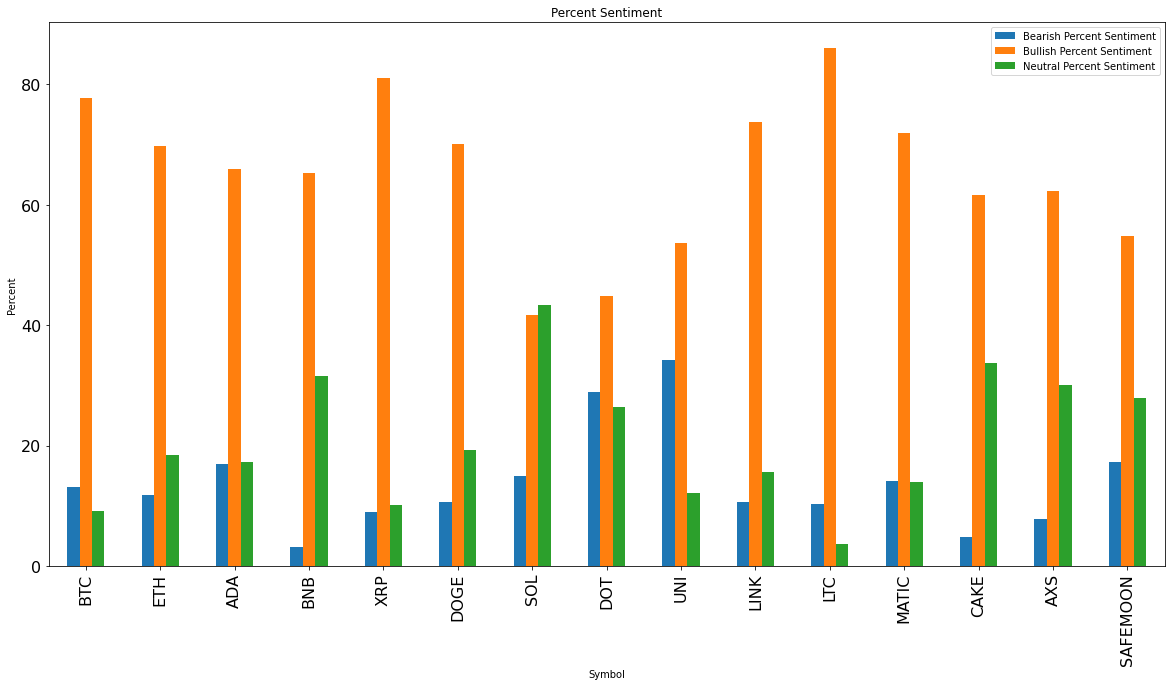

In [56]:
Percent_Sentiment.plot.bar(
               title= "Percent Sentiment", xlabel="Symbol", ylabel="Percent", fontsize=16, figsize= (20, 10))
             

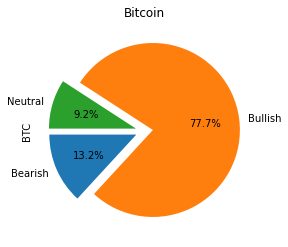

In [57]:
P_Sentiment["BTC"].plot.pie(title="Bitcoin", autopct='%1.1f%%', startangle=180, explode = (0.1, 0.1, 0.1))

In [58]:
import pandas as pd
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import dash_table


In [59]:
app = dash.Dash(__name__)


In [60]:
!pip install jupyter-dash

In [61]:
from jupyter_dash import JupyterDash
app=JupyterDash(__name__)

In [62]:
app.layout = html.Div([
                       html.Div([
                                 html.Label(["Crypto Sentiment"]),
                                 dcc.Dropdown(
                                     id="my_dropdown",
                                     options=[{"label": "Bitcoin", "value": "BTC"},
                                              {"label": "Ethereum", "value": "ETH"},
                                              {"label": "Chainlink", "value": "LINK"},
                                              {"label": "Ripple", "value": "XRP"},
                                              {"label": "Cardano", "value": "ADA"},
                                              {"label": "Binance", "value": "BNB"},
                                              {"label": "Dogecoin", "value": "DOGE"},
                                              {"label": "Solana", "value": "SOL"},
                                              {"label": "Polkadot", "value": "DOT"},
                                              {"label": "Uniswap", "value": "UNI"},
                                              {"label": "Litecoin", "value": "LTC"},
                                              {"label": "Polygon", "value": "MATIC"},
                                              {"label": "Pancake", "value": "CAKE"},
                                              {"label": "Axie Infinity", "value": "AXS"},
                                              {"label": "Safemoon", "value": "SAFEMOON"}
                                              ],
                                      value="BTC",
                                      multi=False,
                                      clearable=False,
                                      style={"width": "50%"}
                                 ),
                       ]),
                       html.Div([
                                 dcc.Graph(id="the_graph")
                       ]),
])
@app.callback(
    Output(component_id="the_graph", component_property="figure"),
    [Input(component_id="my_dropdown", component_property="value")]
)
def update_graph(my_dropdown):
  dff = P_Sentiment

  piechart=px.pie(
      data_frame=dff,
      names=["Bearish","Bullish", "Neutral"],
      hole=.1,
      values= dff[my_dropdown]

  )
  return(piechart)

if __name__ == "__main__":
  app.run_server(host="0.0.0.0", port=5000)


Dash app running on:


<IPython.core.display.Javascript object>